# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![image.png](attachment:image.png)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


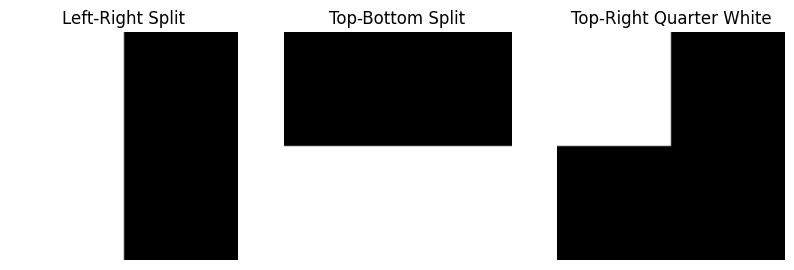

In [ ]:
# solution
import numpy as np
import matplotlib.pyplot as plt


image1 = np.zeros((100, 100))
image1[:, :50] = 255
image2 = np.zeros((100, 100))
image2[50:, :] = 255

image3 = np.zeros((100, 100))
image3[:50, :-50] = 255

fig, axes = plt.subplots(1, 3, figsize=(10, 5))


axes[0].imshow(image1, cmap="gray")
axes[0].set_title("Left-Right Split")
axes[0].axis("off")

axes[1].imshow(image2, cmap="gray")
axes[1].set_title("Top-Bottom Split")
axes[1].axis("off")

axes[2].imshow(image3, cmap="gray")
axes[2].set_title("Top-Right Quarter White")
axes[2].axis("off")

plt.show()


*   Use the above three images to create the following image

![image-2.png](attachment:image-2.png)
*Hint: Remember channels and color spaces*

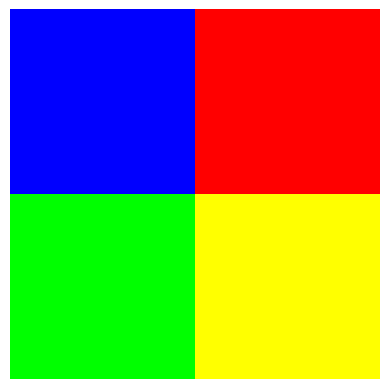

In [ ]:
# solution
import numpy as np
import matplotlib.pyplot as plt

# Define the image size (100x100 pixels)
size = 100

# Create an empty 3D NumPy array for an RGB image (height, width, channels)
image = np.zeros((size, size, 3), dtype=np.uint8)

# Fill each quadrant with the correct color
image[:size//2, :size//2] = [0, 0, 255]   # Top-left: Blue
image[:size//2, size//2:] = [255, 0, 0]   # Top-right: Red
image[size//2:, :size//2] = [0, 255, 0]   # Bottom-left: Green
image[size//2:, size//2:] = [255, 255, 0] # Bottom-right: Yellow

# Display the image using Matplotlib
plt.imshow(image)
plt.axis("off")  # Hide axis for better visualization
plt.show()




### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

![image.png](attachment:image.png)

*   Extract individual channels and plot them using matplotlib subplot.



<class 'numpy.ndarray'>
(476, 618, 3)


array([[196, 190, 175, ..., 170, 169, 169],
       [184, 193, 202, ..., 170, 169, 169],
       [204, 199, 193, ..., 170, 169, 169],
       ...,
       [204, 204, 204, ..., 181, 182, 182],
       [204, 204, 204, ..., 182, 181, 181],
       [205, 205, 205, ..., 187, 184, 184]], dtype=uint8)
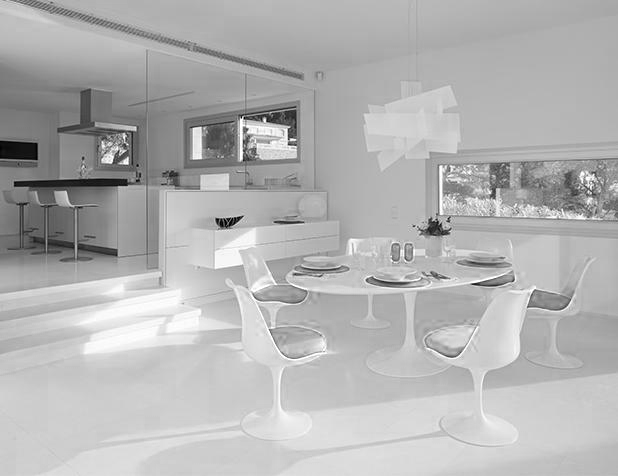

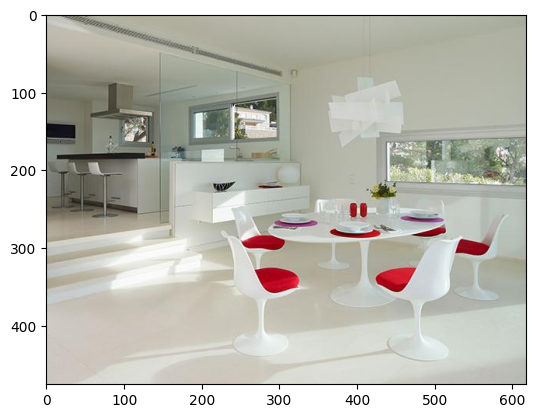

In [ ]:
# solution
from PIL import Image
from numpy import asarray
from matplotlib import image
from matplotlib import pyplot

# load the image
image = Image.open('/content/sillas.jpg')

# convert image to numpy array
data = asarray(image)
print(type(data))

# summarize shape
print(data.shape)

display(data[:,:,0])

# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

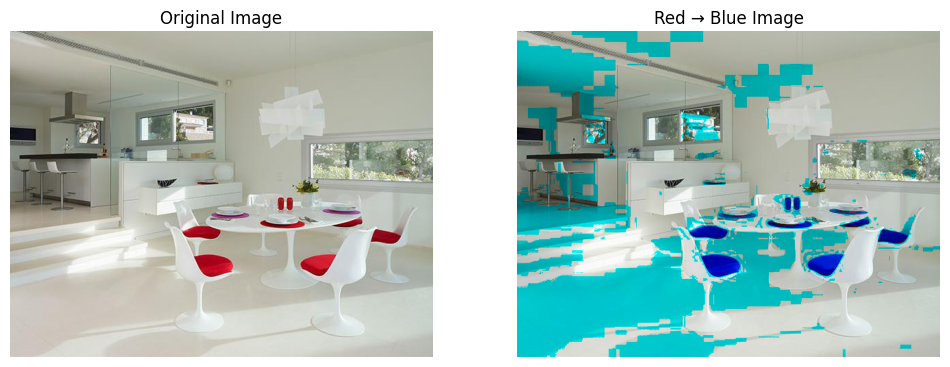

In [ ]:
# solution

data = np.asarray(image)

# Create a copy of the image data
modified_data = data.copy()

# Define a threshold to detect "red" pixels
threshold = 100  # Adjust this value if needed

# Identify red-dominant pixels (Red channel significantly greater than Green & Blue)
red_mask = (data[:, :, 0] > threshold) & (data[:, :, 0] > data[:, :, 1]) & (data[:, :, 0] > data[:, :, 2])

# Swap red with blue for the identified pixels
modified_data[red_mask, 0] = 0  # Remove red
modified_data[red_mask, 2] = data[red_mask, 0]  # Move red intensity to blue

# Plot both images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(data)
ax[0].set_title("Original Image")
ax[0].axis("off")

# Modified image
ax[1].imshow(modified_data)
ax[1].set_title("Red → Blue Image")
ax[1].axis("off")

plt.show()#

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

![image.png](attachment:image.png)

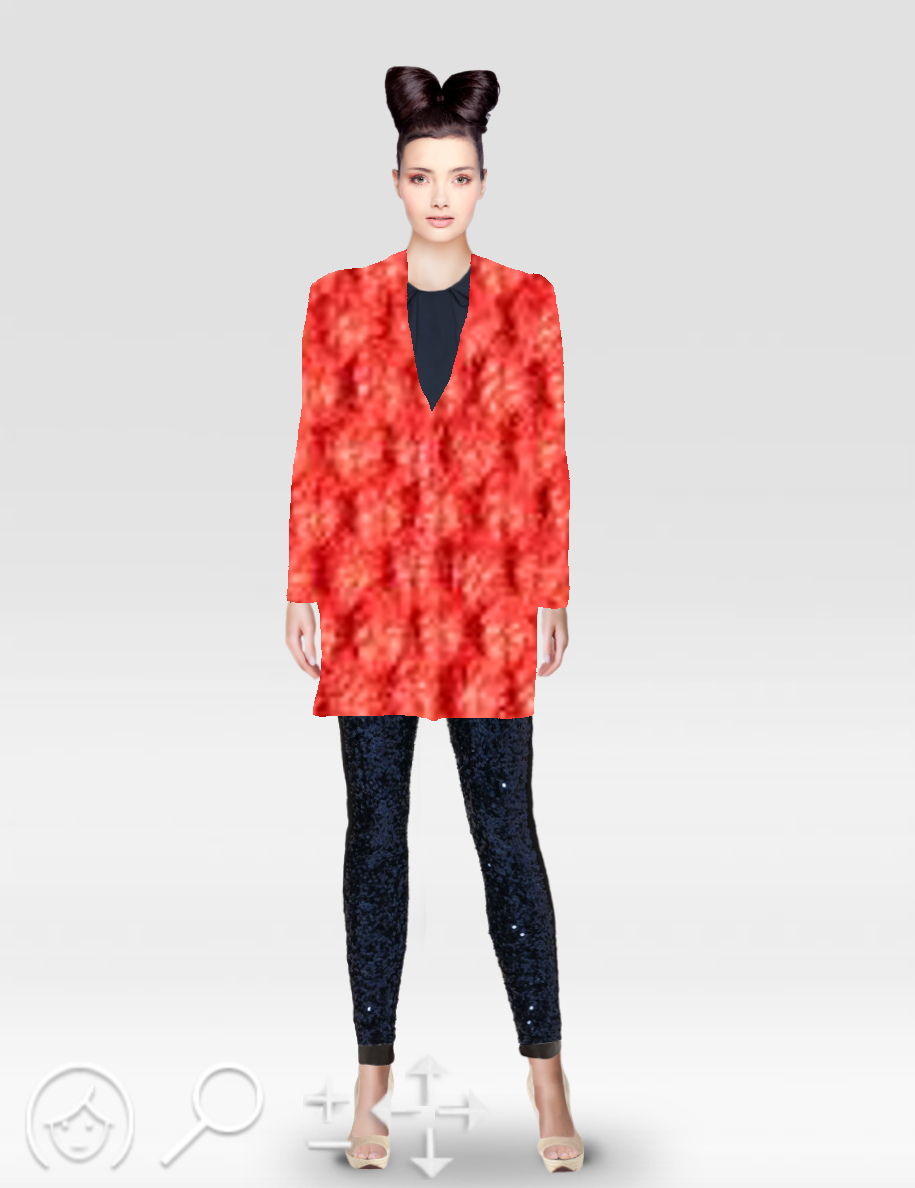

In [ ]:
# solution
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def overlay_coat(model_path, coat_path, texture_path, output_path):
    # Load images
    model = cv2.imread("/content/sample_data/model.png")
    coat = cv2.imread("/content/sample_data/coat.png")
    texture = cv2.imread("/content/sample_data/texture2.png")

    # Convert coat image to grayscale and create a binary mask
    coat_gray = cv2.cvtColor(coat, cv2.COLOR_BGR2GRAY)
    _, coat_mask = cv2.threshold(coat_gray, 10, 255, cv2.THRESH_BINARY)

    # Resize texture to match coat size
    texture_resized = cv2.resize(texture, (coat.shape[1], coat.shape[0]))

    # Apply texture to the coat using bitwise operations
    coat_colored = cv2.bitwise_and(texture_resized, texture_resized, mask=coat_mask)
    background = cv2.bitwise_and(coat, coat, mask=cv2.bitwise_not(coat_mask))
    coat_final = cv2.add(coat_colored, background)

    # Find the region where coat needs to be placed on model
    model_gray = cv2.cvtColor(model, cv2.COLOR_BGR2GRAY)
    _, model_mask = cv2.threshold(model_gray, 10, 255, cv2.THRESH_BINARY)

    # Create an inverse mask for placing the coat
    mask_inv = cv2.bitwise_not(coat_mask)
    model_bg = cv2.bitwise_and(model, model, mask=mask_inv)
    coat_fg = cv2.bitwise_and(coat_final, coat_final, mask=coat_mask)

    # Overlay the coat on the model
    result = cv2.add(model_bg, coat_fg)

    # Save and display result
    cv2.imwrite(output_path, result)
    cv2_imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Paths to input images
model_image = 'images/model.png'
coat_image = 'images/coat.png'
texture_image = 'images/texture1.png'  # Change to any given texture
output_image = 'images/result.png'

overlay_coat(model_image, coat_image, texture_image, output_image)


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




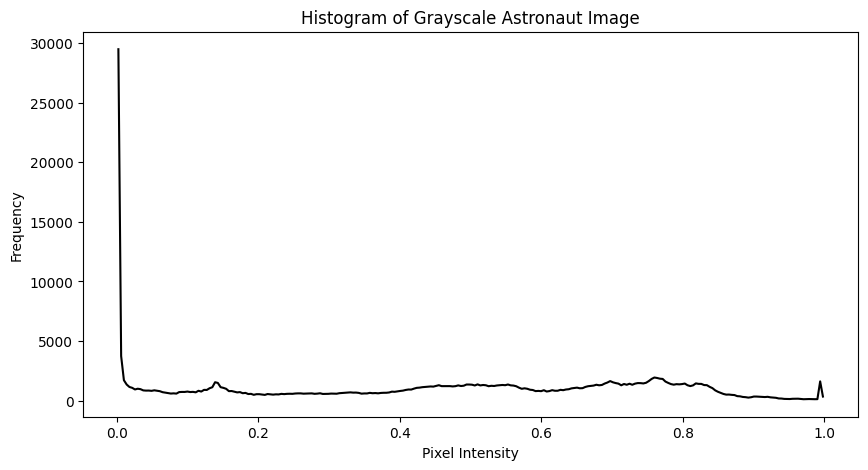

In [ ]:
from skimage import data, color, exposure
import matplotlib.pyplot as plt

def process_astronaut():

    astronaut = data.astronaut()


    astronaut_gray = color.rgb2gray(astronaut)


    hist, bins = exposure.histogram(astronaut_gray)

    plt.figure(figsize=(10, 5))
    plt.plot(bins, hist, color='black')
    plt.title('Histogram of Grayscale Astronaut Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

process_astronaut()

In [ ]:
# solution



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

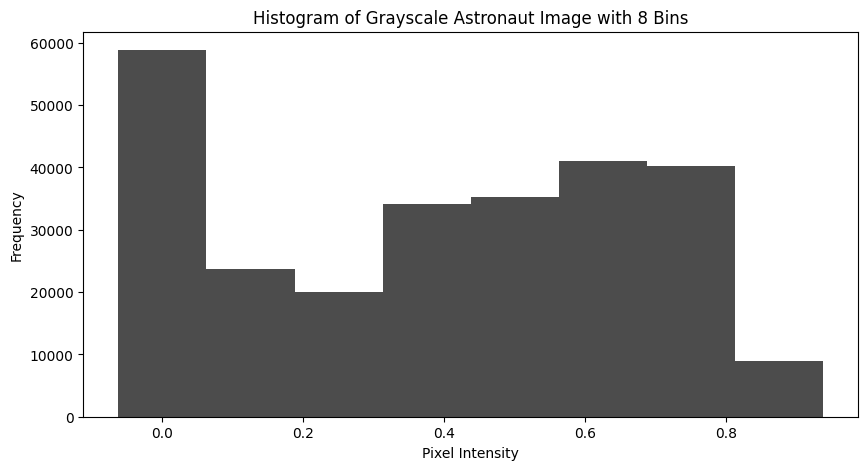

In [ ]:
# solution
def process_astronaut():

    astronaut = data.astronaut()


    astronaut_gray = color.rgb2gray(astronaut)


    hist, bins = np.histogram(astronaut_gray, bins=8, range=(0, 1))


    plt.figure(figsize=(10, 5))
    plt.bar(bins[:-1], hist, width=(bins[1] - bins[0]), color='black', alpha=0.7)
    plt.title('Histogram of Grayscale Astronaut Image with 8 Bins')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

process_astronaut()





*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

The histogram is more generalized, providing a coarse view of pixel intensity distribution.

The histogram becomes more detailed, showing fine-grained variations in intensity.
...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


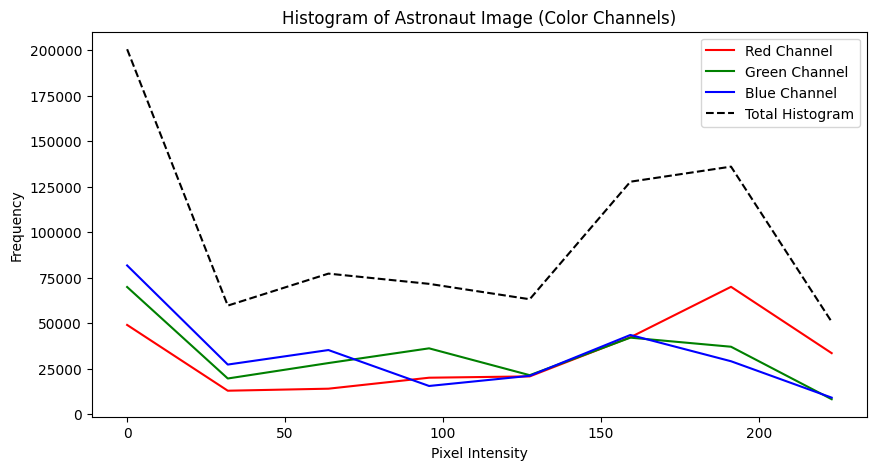

In [ ]:
#solutionimport cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure

def process_astronaut():
    # Load the astronaut image from skimage
    astronaut = data.astronaut()

    # Split channels
    r, g, b = astronaut[:, :, 0], astronaut[:, :, 1], astronaut[:, :, 2]

    # Compute histograms for each channel
    hist_r, bins_r = np.histogram(r, bins=8, range=(0, 255))
    hist_g, bins_g = np.histogram(g, bins=8, range=(0, 255))
    hist_b, bins_b = np.histogram(b, bins=8, range=(0, 255))

    # Compute total histogram
    hist_total, bins_total = np.histogram(astronaut, bins=8, range=(0, 255))

    # Plot the histograms
    plt.figure(figsize=(10, 5))
    plt.plot(bins_r[:-1], hist_r, color='red', label='Red Channel')
    plt.plot(bins_g[:-1], hist_g, color='green', label='Green Channel')
    plt.plot(bins_b[:-1], hist_b, color='blue', label='Blue Channel')
    plt.plot(bins_total[:-1], hist_total, color='black', linestyle='dashed', label='Total Histogram')

    plt.title('Histogram of Astronaut Image (Color Channels)')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Call the function to process and display the histogram
process_astronaut()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



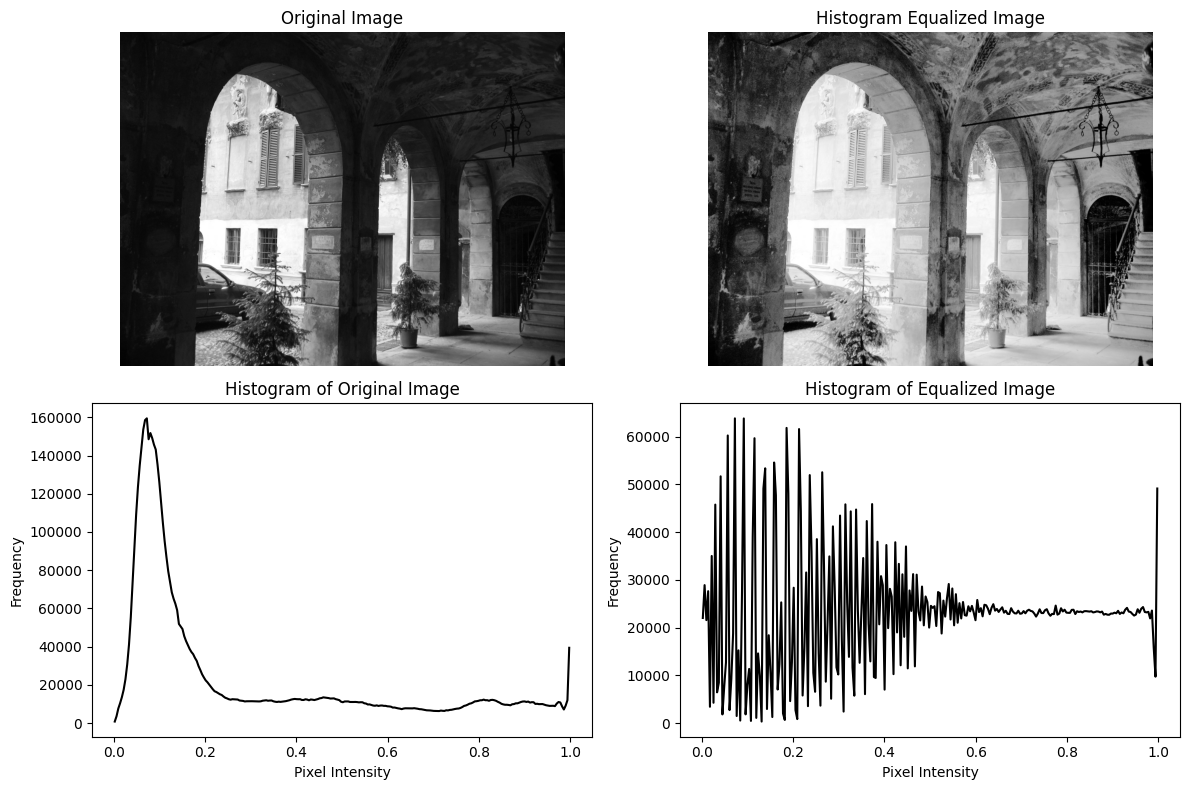

In [2]:
# solution

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, color

def process_low_contrast_image():
    # Load the low contrast image
    image_path = '/content/sample_data/aquatermi_lowcontrast.jpg'
    image = io.imread(image_path, as_gray=True)

    # Compute histogram of the original image
    hist_orig, bins_orig = exposure.histogram(image)

    # Perform histogram equalization
    image_eq = exposure.equalize_hist(image)

    # Compute histogram of the equalized image
    hist_eq, bins_eq = exposure.histogram(image_eq)

    # Plot the original and equalized images with their histograms
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Original Image
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    # Equalized Image
    axes[0, 1].imshow(image_eq, cmap='gray')
    axes[0, 1].set_title('Histogram Equalized Image')
    axes[0, 1].axis('off')

    # Histogram of Original Image
    axes[1, 0].plot(bins_orig, hist_orig, color='black')
    axes[1, 0].set_title('Histogram of Original Image')
    axes[1, 0].set_xlabel('Pixel Intensity')
    axes[1, 0].set_ylabel('Frequency')

    # Histogram of Equalized Image
    axes[1, 1].plot(bins_eq, hist_eq, color='black')
    axes[1, 1].set_title('Histogram of Equalized Image')
    axes[1, 1].set_xlabel('Pixel Intensity')
    axes[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

process_low_contrast_image()


*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**


**Histogram Equalization**: Adjusts pixel values non-linearly using CDF to make the histogram more uniform. Best for uneven contrast images.


**Linear Contrast Stretching**: Scales pixel values linearly between the minimum and maximum intensity. Best for low-contrast images with well-distributed intensities.
Histogram Equalization alters histogram shape, while Linear Stretching only stretches it.

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function).
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



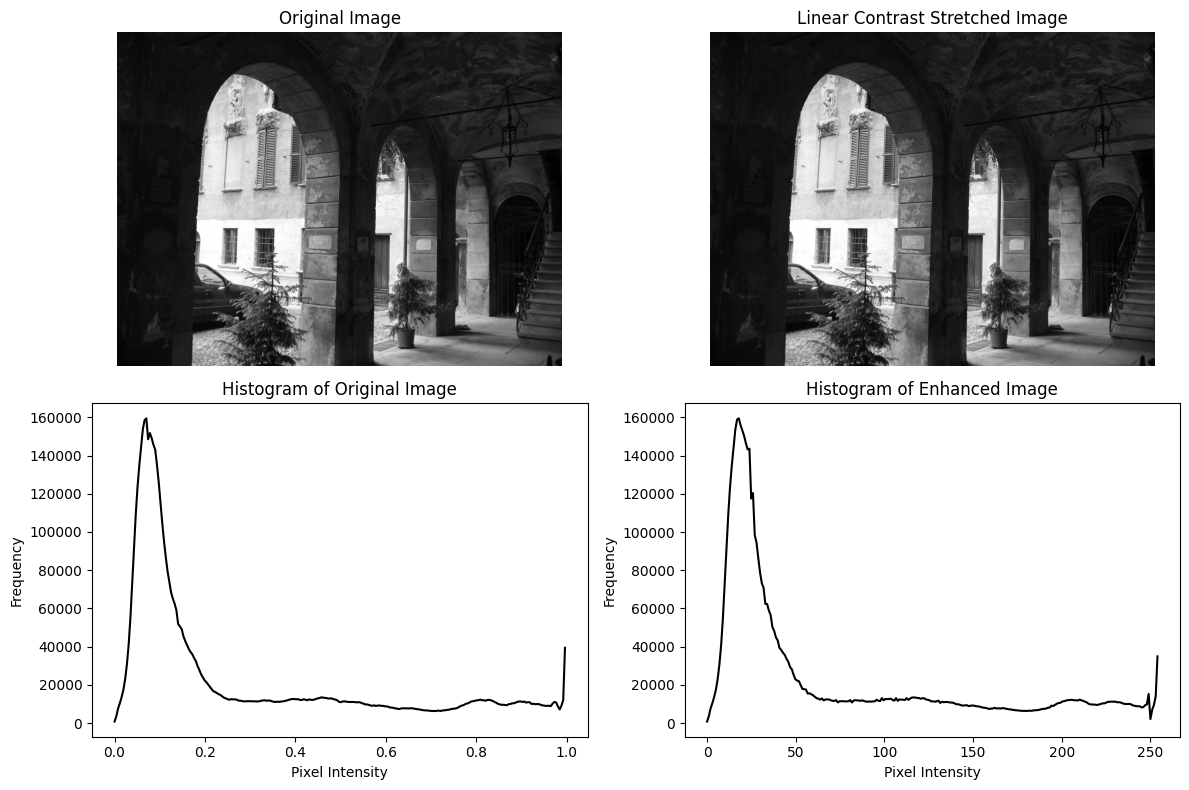

In [5]:
# solution

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure

def linear_contrast_stretch(image):
    """Apply linear contrast stretching to a grayscale image."""
    I_min, I_max = np.min(image), np.max(image)
    stretched = (image - I_min) * (255.0 / (I_max - I_min))
    return stretched.astype(np.uint8)

def process_contrast_stretch():
    # Load the low contrast image
    image_path = '/content/sample_data/aquatermi_lowcontrast.jpg'
    image = io.imread(image_path, as_gray=True)

    # Define number of bins
    bins = 256

    # Apply linear contrast stretch
    enhanced_image = linear_contrast_stretch(image)

    # Compute histograms
    hist_orig, bins_orig = np.histogram(image, bins=bins, range=(0, 1))
    hist_enh, bins_enh = np.histogram(enhanced_image, bins=bins, range=(0, 255))

    # Plot original and enhanced images with histograms
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Original Image
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    # Enhanced Image
    axes[0, 1].imshow(enhanced_image, cmap='gray')
    axes[0, 1].set_title('Linear Contrast Stretched Image')
    axes[0, 1].axis('off')

    # Histogram of Original Image
    axes[1, 0].plot(bins_orig[:-1], hist_orig, color='black')
    axes[1, 0].set_title('Histogram of Original Image')
    axes[1, 0].set_xlabel('Pixel Intensity')
    axes[1, 0].set_ylabel('Frequency')

    # Histogram of Enhanced Image
    axes[1, 1].plot(bins_enh[:-1], hist_enh, color='black')
    axes[1, 1].set_title('Histogram of Enhanced Image')
    axes[1, 1].set_xlabel('Pixel Intensity')
    axes[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the function to process and display results
process_contrast_stretch()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




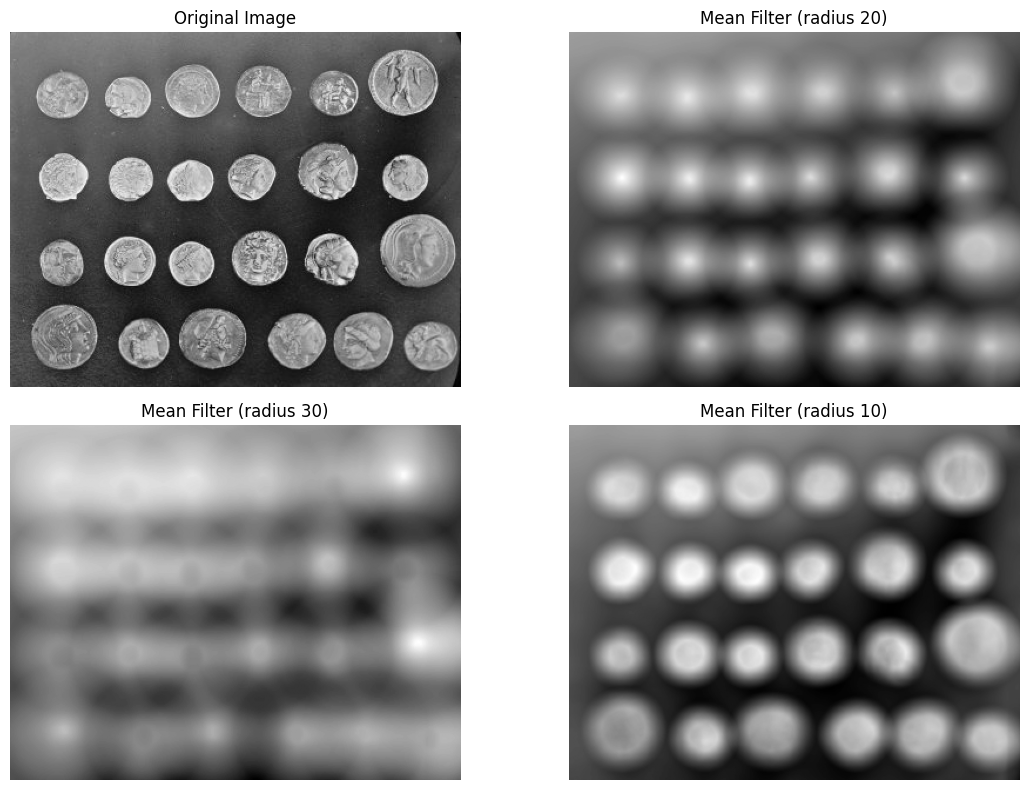

In [7]:
# solution
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure, morphology, filters
from skimage.data import coins

def linear_contrast_stretch(image):
    """Apply linear contrast stretching to a grayscale image."""
    I_min, I_max = np.min(image), np.max(image)
    stretched = (image - I_min) * (255.0 / (I_max - I_min))
    return stretched.astype(np.uint8)

def apply_mean_filter(image, radius):
    """Apply mean filter using a disk structuring element."""
    selem = morphology.disk(radius)
    return filters.rank.mean(image, selem)

def process_image():
    # Load the coins image from skimage.data
    image = coins()

    # Apply mean filter with different radii
    filtered_20 = apply_mean_filter(image, 20)
    filtered_30 = apply_mean_filter(image, 30)
    filtered_10 = apply_mean_filter(image, 10)

    # Plot original and filtered images
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Original Image
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    # Mean Filtered Image (radius 20)
    axes[0, 1].imshow(filtered_20, cmap='gray')
    axes[0, 1].set_title('Mean Filter (radius 20)')
    axes[0, 1].axis('off')

    # Mean Filtered Image (radius 30)
    axes[1, 0].imshow(filtered_30, cmap='gray')
    axes[1, 0].set_title('Mean Filter (radius 30)')
    axes[1, 0].axis('off')

    # Mean Filtered Image (radius 10)
    axes[1, 1].imshow(filtered_10, cmap='gray')
    axes[1, 1].set_title('Mean Filter (radius 10)')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to process and display results
process_image()



*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

<ipython-input-8-67530b2d9b1b>:18: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Square": morphology.square(20),
<ipython-input-8-67530b2d9b1b>:19: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  "Rectangle": morphology.rectangle(20, 30),


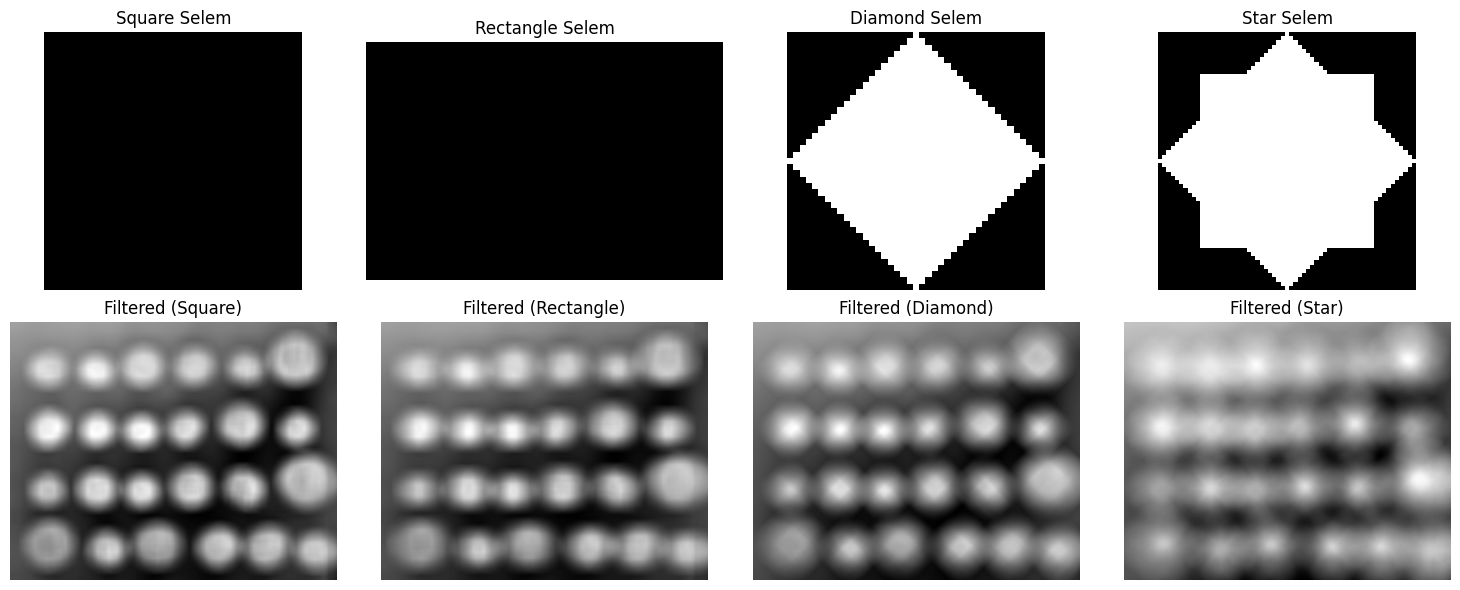

In [8]:
# solution

from skimage import io, exposure, morphology, filters
from skimage.data import coins

def apply_mean_filter(image, selem):
    """Apply mean filter using a given structuring element."""
    return filters.rank.mean(image, selem)

def process_image():
    # Load the coins image from skimage.data
    image = coins()

    # Define different structuring elements
    structuring_elements = {
        "Square": morphology.square(20),
        "Rectangle": morphology.rectangle(20, 30),
        "Diamond": morphology.diamond(20),
        "Star": morphology.star(20)
    }

    # Apply mean filter with different structuring elements
    filtered_images = {name: apply_mean_filter(image, selem) for name, selem in structuring_elements.items()}

    # Create subplots
    fig, axes = plt.subplots(2, len(structuring_elements), figsize=(15, 6))

    # Plot structuring elements
    for idx, (name, selem) in enumerate(structuring_elements.items()):
        axes[0, idx].imshow(selem, cmap='gray')
        axes[0, idx].set_title(f'{name} Selem')
        axes[0, idx].axis('off')

    # Plot filtered images
    for idx, (name, filtered) in enumerate(filtered_images.items()):
        axes[1, idx].imshow(filtered, cmap='gray')
        axes[1, idx].set_title(f'Filtered ({name})')
        axes[1, idx].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to process and display results
process_image()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

Increasing the disk radius increases the smoothing effect by averaging over a larger area, reducing noise and details. A smaller radius preserves more details but provides less smoothing.

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

**Square**: Blurs the image evenly in all directions, making edges less sharp.

**Rectangle**: Blurs more in one direction (wider area), causing slight elongation in smoothing.

**Diamond**: Keeps more details compared to square but still smooths the image.

**Octagon**: A balance between square and diamond, providing smoother but less aggressive filtering.





*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

The mean filter and Gaussian filter both smooth images, but they work differently. The mean filter takes the average of nearby pixels, making the image blurry but sometimes losing details. The Gaussian filter gives more importance to the center pixels and less to the outer ones, creating a smoother blur while keeping edges clearer. The mean filter is faster and good for removing simple noise, but it can make images look blocky. The Gaussian filter is better for reducing noise while keeping important details.